In [1]:
from datascience import *

import numpy as np
import os

from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

import pandas as pd
import io
import math

In [2]:
#Loading testing data
from client.api.notebook import Notebook 
lab09 = Notebook('lab09.ok')
_ = lab09.auth(inline=True)

# Lab 09 - Exploring project datasets

### Partners

If you have a partner for the final project, please work with him/her today! For everyone else, we'll randomly draw partners today.

**What is your partner's name?**

[ANSWER HERE]

**What year is your partner in?**

[ANSWER HERE]

## Diving into the project data

Here are some general resources for the final project:

* [Description of the final project](https://docs.google.com/document/d/1YaNTECdvXV6gcoEdAYCNmIVYBUMPMOoNDxZ6XVS6e4I/edit?usp=sharing), including requirements, important dates, etc
* [Link to a folder where you can code up the project](http://datahub.berkeley.edu/user-redirect/interact?account=ds-connectors&repo=LS-88-Demography&branch=master&path=project). **Please be sure to write your final project code in `project.ipynb`; this is the only file that `okpy` will submit.**

This lab will be quite different from previous labs: the main goal is not to learn a new concept, but rather to explore a few new datasets. These new datasets can be the basis for your final projects. 

Some general notes

* you are free to combine these datasets with other data we used in one of the labs; you can also try to find outside datasets (though this is not necessary)
* you are also free -- even encouraged! -- to make use of functions and tools we developed in labs. The `mig` and `leslie` packages are included in this directory; you can also copy/paste and adapt code from other labs if it is helpful

To get started, let's load the `leslie` and `mig` packages

In [3]:
import leslie
import mig

## Topic 1: Health and mortality in US counties

The first set of data comes from a research group called the Institute for Health Metrics and Evaluation (IHME). They have estimated mortality by cause for every county in the US. This dataset would be a good place to start if you are interested in the opioid epidemic, the spread of obesity, or aging in the US.

We have prepared a collection of four datasets for you to explore:

* death rates by county (these are aggregated death rates, i.e. deaths due to any cause)
* death rates by broad cause group by county
* alcohol-related death rates by county
* drug-related death rates by county

These data come from [IHME US Data](http://ghdx.healthdata.org/us-data). In particular, we grabbed these files

* [United States Substance Use Disorders and Intentional Injuries Mortality Rates by County 1980-2014](http://ghdx.healthdata.org/record/united-states-substance-use-disorders-and-intentional-injuries-mortality-rates-county-1980)
* [United States Mortality Rates by County 1980-2014](http://ghdx.healthdata.org/record/united-states-mortality-rates-county-1980-2014)

and did some cleaning to make them a bit easier to use. You might still have to do some cleaning of your own, though.

You can investigate, for example, what proportion of deaths in a given county is due to drugs by combining information from the drug-related dataset and the aggregate death rates.

These death rates are per 100,000. (So a death rate of 1,000 per 100,000 would be .01 as a proportion.) They have also been age-standardized so the effect of different age structure in different counties has been adjusted for.

The first file has death rate estimates by county:

In [4]:
us_agg_deathrates = Table.read_table('../data/projects/ihme_aggregate_death_rates.csv')
us_agg_deathrates

Location                         | fips  | Mortality Rate, 1980* | Mortality Rate, 1985* | Mortality Rate, 1990* | Mortality Rate, 1995* | Mortality Rate, 2000* | Mortality Rate, 2005* | Mortality Rate, 2010* | Mortality Rate, 2014*
Abbeville County, South Carolina | 45001 | 1047.78               | 1003.1                | 972.51                | 990.14                | 956.8                 | 886.64                | 863.47                | 869.27
Acadia Parish, Louisiana         | 22001 | 1229.46               | 1212.86               | 1161.98               | 1214.15               | 1172.24               | 1158.55               | 1074.25               | 1083.95
Accomack County, Virginia        | 51001 | 1250.93               | 1211.76               | 1134.18               | 1133.04               | 1089.67               | 1038.31               | 973.6                 | 974.07
Ada County, Idaho                | 16001 | 982.44                | 944.72                | 886.72                | 860.86                | 829.04                | 784.6                 | 713.98                | 720.29
Adair County, Iowa               | 19001 | 910.06                | 884.4                 | 852.76                | 867.46                | 852.46                | 833.15                | 806.9                 | 807.66
Adair County, Kentucky           | 21001 | 1087.47               | 1061.78               | 1045.01               | 1037.67               | 1021.38               | 970.14                | 916.79                | 929.49
Adair County, Missouri           | 29001 | 1026.94               | 998.1                 | 957.87                | 972.72                | 964.27                | 947.7                 | 878.67                | 899.68
Adair County, Oklahoma           | 40001 | 1240.71               | 1248.29               | 1238.39               | 1229.96               | 1216.39               | 1175.88               | 1116.57               | 1104.72
Adams County, Colorado           | 8001  | 995.75                | 951.99                | 910.78                | 905.89                | 856.5                 | 804.96                | 738.99                | 737.38
Adams County, Idaho              | 16003 | 946.52                | 894.87                | 846.43                | 828.34                | 792.66                | 759.25                | 690                   | 643.4
... (3132 rows omitted)

The next file has death rate estimates by cause group and county

In [5]:
us_causegp_deathrates = Table.read_table('../data/projects/ihme_causegroup_death_rates.csv')
us_causegp_deathrates

Location                 | fips | Mortality Rate, 1980* | Mortality Rate, 1985* | Mortality Rate, 1990* | Mortality Rate, 1995* | Mortality Rate, 2000* | Mortality Rate, 2005* | Mortality Rate, 2010* | Mortality Rate, 2014* | cause
Autauga County, Alabama  | 1001 | 0.95                  | 1.44                  | 6.57                  | 10.75                 | 3.62                  | 3.32                  | 2.37                  | 2.3                   | HIV-AIDS & tuberculosis
Baldwin County, Alabama  | 1003 | 0.84                  | 1.44                  | 6.51                  | 11.18                 | 3.82                  | 3.18                  | 2.27                  | 2.01                  | HIV-AIDS & tuberculosis
Barbour County, Alabama  | 1005 | 1.11                  | 1.81                  | 7.86                  | 15.65                 | 6.33                  | 6.19                  | 4.67                  | 4.45                  | HIV-AIDS & tuberculosis
Bibb County, Alabama     | 1007 | 0.88                  | 1.21                  | 5.13                  | 9.69                  | 2.89                  | 2.65                  | 1.74                  | 1.51                  | HIV-AIDS & tuberculosis
Blount County, Alabama   | 1009 | 1.08                  | 1.24                  | 4.66                  | 8.5                   | 2.71                  | 2.33                  | 1.48                  | 1.31                  | HIV-AIDS & tuberculosis
Bullock County, Alabama  | 1011 | 1.48                  | 2.53                  | 11.13                 | 20.31                 | 7.63                  | 7.05                  | 5.1                   | 4.45                  | HIV-AIDS & tuberculosis
Butler County, Alabama   | 1013 | 1.3                   | 2.04                  | 8.75                  | 15.09                 | 5.89                  | 5.6                   | 4.09                  | 3.68                  | HIV-AIDS & tuberculosis
Calhoun County, Alabama  | 1015 | 1.98                  | 2.38                  | 8.09                  | 14.09                 | 4.66                  | 3.98                  | 2.55                  | 2.1                   | HIV-AIDS & tuberculosis
Chambers County, Alabama | 1017 | 1.4                   | 2.44                  | 10.03                 | 17.45                 | 6.82                  | 6.03                  | 4.41                  | 3.85                  | HIV-AIDS & tuberculosis
Cherokee County, Alabama | 1019 | 1.39                  | 1.5                   | 5.18                  | 9.36                  | 2.88                  | 2.29                  | 1.43                  | 1.19                  | HIV-AIDS & tuberculosis
... (65972 rows omitted)

In the `us_causegp_deathrates` dataset, all of the deaths have been divided into a broad cause group. We can see all of the possible causes here:

In [6]:
np.unique(us_causegp_deathrates['cause'])

array(['Cardiovascular diseases', 'Chronic respiratory diseases',
       'Cirrhosis & other chronic ', 'Diabetes, urogenital, blood',
       'Diarrhea, lower respiratory', 'Digestive diseases',
       'Forces of nature, war, & legal ', 'HIV-AIDS & tuberculosis',
       'Maternal disorders', 'Mental & substance use ',
       'Musculoskeletal disorders', 'Neglected tropical diseases',
       'Neonatal disorders', 'Neoplasms', 'Neurological disorders',
       'Nutritional deficiencies', 'Other communicable, maternal, ',
       'Other non-communicable ', 'Self-harm & interpersonal ',
       'Transport injuries', 'Unintentional injuries'],
      dtype='<U31')

Two additional files have death rate estimates specifically related to two factors related to the 'deaths of despair', which have attracted much policy and media attention recently.
  
  
*NOTE: Alabama is missing from these two cause-specific datasets. I suspect this is a mistake that took place when IHME published the archives online; we'll have to do without the Alabama data for the purposes of this project*


The first file has death rate estimates for alchol-related causes by county:

In [7]:
us_alcohol_deathrates = Table.read_table('../data/projects/ihme_alcohol_death_rates.csv')
us_alcohol_deathrates

Location                     | fips  | Mortality Rate, 1980* | Mortality Rate, 1985* | Mortality Rate, 1990* | Mortality Rate, 1995* | Mortality Rate, 2000* | Mortality Rate, 2005* | Mortality Rate, 2010* | Mortality Rate, 2014*
Aitkin County, Minnesota     | 27001 | 0.55                  | 0.78                  | 1.24                  | 1.97                  | 3.6                   | 6.77                  | 9.14                  | 9.97
Anoka County, Minnesota      | 27003 | 0.39                  | 0.5                   | 0.76                  | 1.08                  | 2.28                  | 4.1                   | 6.13                  | 6.03
Becker County, Minnesota     | 27005 | 0.43                  | 0.55                  | 0.81                  | 1.23                  | 2.08                  | 3.95                  | 5.43                  | 5.62
Beltrami County, Minnesota   | 27007 | 0.49                  | 0.67                  | 1.08                  | 1.65                  | 3.16                  | 6.34                  | 8.75                  | 9.58
Benton County, Minnesota     | 27009 | 0.35                  | 0.46                  | 0.75                  | 1.22                  | 2.07                  | 4.26                  | 5.91                  | 6.23
Big Stone County, Minnesota  | 27011 | 0.51                  | 0.63                  | 0.87                  | 1.3                   | 2.14                  | 3.77                  | 4.94                  | 4.9
Blue Earth County, Minnesota | 27013 | 0.4                   | 0.44                  | 0.57                  | 0.78                  | 1.3                   | 2.34                  | 2.93                  | 3.21
Brown County, Minnesota      | 27015 | 0.39                  | 0.45                  | 0.56                  | 0.71                  | 1.1                   | 1.87                  | 2.53                  | 2.44
Carlton County, Minnesota    | 27017 | 0.5                   | 0.67                  | 1.11                  | 1.65                  | 3.21                  | 6.26                  | 8.43                  | 9.73
Carver County, Minnesota     | 27019 | 0.37                  | 0.44                  | 0.52                  | 0.72                  | 1.06                  | 2.05                  | 2.51                  | 2.49
... (3065 rows omitted)

And the final file has death rate estimates for drug-related causes by county:

In [8]:
us_drug_deathrates = Table.read_table('../data/projects/ihme_drug_death_rates.csv')
us_drug_deathrates

Location                     | fips  | Mortality Rate, 1980* | Mortality Rate, 1985* | Mortality Rate, 1990* | Mortality Rate, 1995* | Mortality Rate, 2000* | Mortality Rate, 2005* | Mortality Rate, 2010* | Mortality Rate, 2014*
Aitkin County, Minnesota     | 27001 | 0.55                  | 0.78                  | 1.24                  | 1.97                  | 3.6                   | 6.77                  | 9.14                  | 9.97
Anoka County, Minnesota      | 27003 | 0.39                  | 0.5                   | 0.76                  | 1.08                  | 2.28                  | 4.1                   | 6.13                  | 6.03
Becker County, Minnesota     | 27005 | 0.43                  | 0.55                  | 0.81                  | 1.23                  | 2.08                  | 3.95                  | 5.43                  | 5.62
Beltrami County, Minnesota   | 27007 | 0.49                  | 0.67                  | 1.08                  | 1.65                  | 3.16                  | 6.34                  | 8.75                  | 9.58
Benton County, Minnesota     | 27009 | 0.35                  | 0.46                  | 0.75                  | 1.22                  | 2.07                  | 4.26                  | 5.91                  | 6.23
Big Stone County, Minnesota  | 27011 | 0.51                  | 0.63                  | 0.87                  | 1.3                   | 2.14                  | 3.77                  | 4.94                  | 4.9
Blue Earth County, Minnesota | 27013 | 0.4                   | 0.44                  | 0.57                  | 0.78                  | 1.3                   | 2.34                  | 2.93                  | 3.21
Brown County, Minnesota      | 27015 | 0.39                  | 0.45                  | 0.56                  | 0.71                  | 1.1                   | 1.87                  | 2.53                  | 2.44
Carlton County, Minnesota    | 27017 | 0.5                   | 0.67                  | 1.11                  | 1.65                  | 3.21                  | 6.26                  | 8.43                  | 9.73
Carver County, Minnesota     | 27019 | 0.37                  | 0.44                  | 0.52                  | 0.72                  | 1.06                  | 2.05                  | 2.51                  | 2.49
... (3065 rows omitted)

**Tip:** You can add state by grabbing the first two digits of the fips code:

In [9]:
us_drug_withstate = us_drug_deathrates.with_column('state', np.array([int(str(x)[:2]) for x in us_drug_deathrates['fips']]))
us_drug_withstate

Location                     | fips  | Mortality Rate, 1980* | Mortality Rate, 1985* | Mortality Rate, 1990* | Mortality Rate, 1995* | Mortality Rate, 2000* | Mortality Rate, 2005* | Mortality Rate, 2010* | Mortality Rate, 2014* | state
Aitkin County, Minnesota     | 27001 | 0.55                  | 0.78                  | 1.24                  | 1.97                  | 3.6                   | 6.77                  | 9.14                  | 9.97                  | 27
Anoka County, Minnesota      | 27003 | 0.39                  | 0.5                   | 0.76                  | 1.08                  | 2.28                  | 4.1                   | 6.13                  | 6.03                  | 27
Becker County, Minnesota     | 27005 | 0.43                  | 0.55                  | 0.81                  | 1.23                  | 2.08                  | 3.95                  | 5.43                  | 5.62                  | 27
Beltrami County, Minnesota   | 27007 | 0.49                  | 0.67                  | 1.08                  | 1.65                  | 3.16                  | 6.34                  | 8.75                  | 9.58                  | 27
Benton County, Minnesota     | 27009 | 0.35                  | 0.46                  | 0.75                  | 1.22                  | 2.07                  | 4.26                  | 5.91                  | 6.23                  | 27
Big Stone County, Minnesota  | 27011 | 0.51                  | 0.63                  | 0.87                  | 1.3                   | 2.14                  | 3.77                  | 4.94                  | 4.9                   | 27
Blue Earth County, Minnesota | 27013 | 0.4                   | 0.44                  | 0.57                  | 0.78                  | 1.3                   | 2.34                  | 2.93                  | 3.21                  | 27
Brown County, Minnesota      | 27015 | 0.39                  | 0.45                  | 0.56                  | 0.71                  | 1.1                   | 1.87                  | 2.53                  | 2.44                  | 27
Carlton County, Minnesota    | 27017 | 0.5                   | 0.67                  | 1.11                  | 1.65                  | 3.21                  | 6.26                  | 8.43                  | 9.73                  | 27
Carver County, Minnesota     | 27019 | 0.37                  | 0.44                  | 0.52                  | 0.72                  | 1.06                  | 2.05                  | 2.51                  | 2.49                  | 27
... (3065 rows omitted)

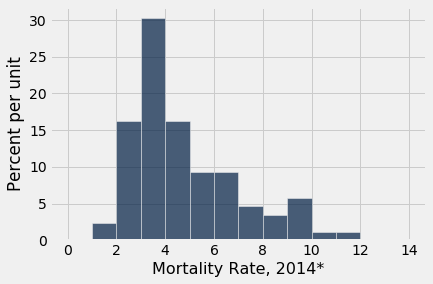

In [10]:
## histogram of drug deathrates in Minnesota counties in 2014
us_drug_withstate.where('state', 27).hist('Mortality Rate, 2014*', bins=np.arange(0,15,1))
#plots.title('Drug deathrates in Minnesota counties (2014)');

We can make a map of overall, age-standardized death rates in 2014:

In [11]:
mig.map_counties(us_agg_deathrates, 'Mortality Rate, 2014*')

... and a map of deaths due to maternal causes:

In [12]:
mig.map_counties(us_causegp_deathrates.where('cause', 'Maternal disorders'), 'Mortality Rate, 2014*')

... and a map of deaths due to drug-related causes:

In [13]:
mig.map_counties(us_drug_deathrates, 'Mortality Rate, 2014*')

**Now you can explore the US mortality dataset on your own.**

Some (optional) challenge questions that you can use as a basis to start exploring these data:

* What proportion of deaths in each county is due to drugs? (You can calculate this by dividing each county's drug-related death rate by its total death rate.)
* Which causes of death have increased the most in California's counties since 1980? (You can decide to look either at the absolute increases, or perhaps more interestingly, at the increase in the proportion of all deaths due to each cause.)

## Topic 2: Global demography, population policy, and human capital

The second set of project data are global: they focus on populations all around the world. There are two parts:

* [IHME estimates of human capital](http://ghdx.healthdata.org/record/global-human-capital-estimates-1990-2016)
* [UNPD 2015 population policy variables](https://esa.un.org/poppolicy/wpp_datasets.aspx)

In case you haven't heard of **human capital** before, it is a general term intended to capture skills, expertise, education, and similar things that are useful to economic production, and that are embodied in a person.  [Wikipedia](https://en.wikipedia.org/wiki/Human_capital) defines human capital as follows:

    Human capital is a collection of traits – all the knowledge, talents, skills, abilities, experience, intelligence, training, judgment, and wisdom possessed individually and collectively by individuals in a population.

Human capital is relevant to global demography in part because it is thought to be related to the demographic transition. This is particularly true of human capital among women: as women become more educated, and more economically and socially empowered, fertility is thought to decline. 

This is just one example; there are many other ways human capital could influence population structure and population change.

### Population policy around the world in 2015

The first set of data comes from UNPD. It summarizes population policy around the world in the year 2015. 

You can find a codebook and a description of the dataset [here](https://esa.un.org/poppolicy/img/Definitions_Policy_Variables.pdf). (NOTE: there are a few things that are mentioned in the description that are not in the data that UNPD provides; I'm not sure why this is, but we'll have to do without the variables that are missing.)

In [14]:
unpd_policy = Table.read_table('../data/projects/unpd_policy.csv')
unpd_policy

country_name        | country_code | region                  | development_label | ldc  | policy_growth      | concern_ageing | measures_ageing   | policy_spatial | policy_rural | policy_urban  | policy_fertility | birth_reg_coverage | family_work_balance | adolescent_repro_health | family_planning  | policy_contraception | abortion_legality | unsafe_abortion      | newborn_maternal_mortality | policy_immigration | rationale_immigration | policy_high_skill | immigrant_integration | irregular_immigration | policy_emigration  | diaspora          | citizen_return | measures_ageing_1 | measures_ageing_2 | measures_ageing_3 | measures_ageing_4 | policy_spatial_1 | policy_spatial_2 | policy_spatial_3 | policy_rural_1 | policy_rural_2 | policy_rural_3 | policy_urban_1 | policy_urban_2 | policy_urban_3 | policy_urban_4 | policy_urban_5 | family_work_balance_1 | family_work_balance_2 | family_work_balance_3 | family_work_balance_4 | family_work_balance_5 | family_work_balance_6 | family_work_balance_7 | family_work_balance_8 | adolescent_repro_health_1 | adolescent_repro_health_2 | adolescent_repro_health_3 | policy_contraception_1 | policy_contraception_2 | policy_contraception_3 | policy_contraception_4 | policy_contraception_5 | policy_contraception_6 | abortion_legality_1 | abortion_legality_2 | abortion_legality_3 | abortion_legality_4 | abortion_legality_5 | abortion_legality_6 | abortion_legality_7 | newborn_maternal_mortality_1 | newborn_maternal_mortality_2 | newborn_maternal_mortality_3 | newborn_maternal_mortality_4 | newborn_maternal_mortality_5 | newborn_maternal_mortality_6 | rationale_immigration_1 | rationale_immigration_2 | rationale_immigration_3 | rationale_immigration_4 | immigrant_integration_1 | immigrant_integration_2 | immigrant_integration_3 | irregular_immigration_1 | irregular_immigration_2 | irregular_immigration_3 | diaspora_1 | diaspora_2 | diaspora_3
Afghanistan         | 4            | Asia                    | Less dev. region  | Yes  | Lower              | Minor concern  | 2                 | 1              | 3            | 3,4,5         | Lower            | Yes                | 1,8                 | 1,2,3                   | Direct support   | None of these        | 1                 | No data available    | 1,2,3,4,6                  | Maintain           | 3,4                   | Maintain          | No data available     | No data available     | Maintain           | None of these     | Yes            | 0                 | 1                 | 0                 | 0                 | 1                | 0                | 0                | 0              | 0              | 1              | 0              | 0              | 1              | 1              | 1              | 1                     | 0                     | 0                     | 0                     | 0                     | 0                     | 0                     | 1                     | 1                         | 1                         | 1                         | 0                      | 0                      | 0                      | 0                      | 0                      | 0                      | 1                   | 0                   | 0                   | 0                   | 0                   | 0                   | 0                   | 1                            | 1                            | 1                            | 1                            | 0                            | 1                            | 0                       | 0                       | 1                       | 1                       | 0                       | 0                       | 0                       | 0                       | 0                       | 0                       | 0          | 0          | 0
Albania             | 8            | Europe                  | More dev. region  | No   | Maintain           | Major concern  | 1,2,3             | 1              | 1,3          | 1,2,3,4,5     | Mai

Note that several fo the variables have comma-separated lists of numbers to indicate which policy actions have taken place. For eample, looking at the `measures_ageing` column for Albania, we see `1,2,3`. Referring to the codebook, we see that this means that Albana has (1) raised the minimum retirement age; (2) raised the social security contributions of workers; and (3) introduced or enhanced non-contributory old-age pensions.  Note that there are columns in the datasets that have 0/1 indicator variables for each possible policy. For example, there are columns called `measures_ageing_1`, `measures_ageing_2`,  `measures_ageing_3`, and `measures_ageing_4`. In our example of Albania, `measures_ageing_1`, `measures_ageing_2`, and `measures_ageing_3` would have the value 1 because Albania has adopted these measures. `measures_ageing_4` would be 0, because Albania has not adopted the fourth possible measure (from the codebook, we see that this fourth measure is promoting private savings schemes for retirement).

We can link these UNPD policy variables to the other UNPD data we have analyzed in labs this semester. We can load information on total fertility rate, for example:

In [15]:
unpd_tfr = Table.read_table('../data/UNPD/unpd_tfr_cleaned.csv')
unpd_tfr

row  | variant   | area       | notes | country_code | period | tfr
15   | Estimates | Burundi    | nan   | 108          | 1955   | 6.801
16   | Estimates | Comoros    | nan   | 174          | 1955   | 6
17   | Estimates | Djibouti   | nan   | 262          | 1955   | 6.312
18   | Estimates | Eritrea    | nan   | 232          | 1955   | 6.965
19   | Estimates | Ethiopia   | nan   | 231          | 1955   | 7.1696
20   | Estimates | Kenya      | nan   | 404          | 1955   | 7.481
21   | Estimates | Madagascar | nan   | 450          | 1955   | 7.3
22   | Estimates | Malawi     | nan   | 454          | 1955   | 6.85
23   | Estimates | Mauritius  | 1     | 480          | 1955   | 5.895
24   | Estimates | Mayotte    | nan   | 175          | 1955   | 7.91
... (2603 rows omitted)

And now we can join this TFR data onto the policy dataset. (We'll only grab TFR for 2015, since the policy data are only for 2015.)

In [16]:
unpd_tfr_2015 = unpd_tfr.where('period', 2015)
tfr_and_policy_2015 = unpd_policy.join('country_name', unpd_tfr_2015, 'area')
tfr_and_policy_2015

country_name        | country_code | region                  | development_label | ldc  | policy_growth      | concern_ageing | measures_ageing   | policy_spatial | policy_rural | policy_urban | policy_fertility | birth_reg_coverage | family_work_balance | adolescent_repro_health | family_planning  | policy_contraception | abortion_legality | unsafe_abortion      | newborn_maternal_mortality | policy_immigration | rationale_immigration | policy_high_skill | immigrant_integration | irregular_immigration | policy_emigration  | diaspora          | citizen_return | measures_ageing_1 | measures_ageing_2 | measures_ageing_3 | measures_ageing_4 | policy_spatial_1 | policy_spatial_2 | policy_spatial_3 | policy_rural_1 | policy_rural_2 | policy_rural_3 | policy_urban_1 | policy_urban_2 | policy_urban_3 | policy_urban_4 | policy_urban_5 | family_work_balance_1 | family_work_balance_2 | family_work_balance_3 | family_work_balance_4 | family_work_balance_5 | family_work_balance_6 | family_work_balance_7 | family_work_balance_8 | adolescent_repro_health_1 | adolescent_repro_health_2 | adolescent_repro_health_3 | policy_contraception_1 | policy_contraception_2 | policy_contraception_3 | policy_contraception_4 | policy_contraception_5 | policy_contraception_6 | abortion_legality_1 | abortion_legality_2 | abortion_legality_3 | abortion_legality_4 | abortion_legality_5 | abortion_legality_6 | abortion_legality_7 | newborn_maternal_mortality_1 | newborn_maternal_mortality_2 | newborn_maternal_mortality_3 | newborn_maternal_mortality_4 | newborn_maternal_mortality_5 | newborn_maternal_mortality_6 | rationale_immigration_1 | rationale_immigration_2 | rationale_immigration_3 | rationale_immigration_4 | immigrant_integration_1 | immigrant_integration_2 | immigrant_integration_3 | irregular_immigration_1 | irregular_immigration_2 | irregular_immigration_3 | diaspora_1 | diaspora_2 | diaspora_3 | row  | variant   | notes | country_code_2 | period | tfr
Afghanistan         | 4            | Asia                    | Less dev. region  | Yes  | Lower              | Minor concern  | 2                 | 1              | 3            | 3,4,5        | Lower            | Yes                | 1,8                 | 1,2,3                   | Direct support   | None of these        | 1                 | No data available    | 1,2,3,4,6                  | Maintain           | 3,4                   | Maintain          | No data available     | No data available     | Maintain           | None of these     | Yes            | 0                 | 1                 | 0                 | 0                 | 1                | 0                | 0                | 0              | 0              | 1              | 0              | 0              | 1              | 1              | 1              | 1                     | 0                     | 0                     | 0                     | 0                     | 0                     | 0                     | 1                     | 1                         | 1                         | 1                         | 0                      | 0                      | 0                      | 0                      | 0                      | 0                      | 1                   | 0                   | 0                   | 0                   | 0                   | 0                   | 0                   | 1                            | 1                            | 1                            | 1                            | 0                            | 1                            | 0                       | 0                       | 1                       | 1                       | 0                       | 0                       | 0                       | 0                       | 0                       | 0                       | 0          | 0          | 0          | 94   | Estimates | nan   | 4              | 2015   | 5.2552
Albania             | 8            | Europe                  | More dev

Just as an example, let's look at policies related to family/work balance and TFR. On the one hand, we might predict that countries with policies that are favorable to family/work balance lead to higher fertility, because we would expect that they make it easier to raise children. On the other hand, it could be the case the countries that adopt family/work balance policies have low fertility because they are wealthier; indeed, countries with low fertilities might adopt family/work balance policies to try to increase their national TFR.

Let's investigate. Looking at the codebook, it appears that there are 8 possible family/work balance policies that could be adopted (according to UNPD). We'll start by creating a crude indicator for how pro family/work balance a country is by simply adding up how many of the 8 possible policies each country has adopted:

In [17]:
num_famwork = tfr_and_policy_2015.with_column('num_famwork_measures',
                                tfr_and_policy_2015['family_work_balance_1'] +
                                tfr_and_policy_2015['family_work_balance_2'] +
                                tfr_and_policy_2015['family_work_balance_3'] +
                                tfr_and_policy_2015['family_work_balance_4'] +
                                tfr_and_policy_2015['family_work_balance_5'] +
                                tfr_and_policy_2015['family_work_balance_6'] +
                                tfr_and_policy_2015['family_work_balance_7'] +
                                tfr_and_policy_2015['family_work_balance_8'])

We can visually examine the relationship between family/work balance policies and TFR with a scatter plot (we'll add a fit line to summarize the relationship):

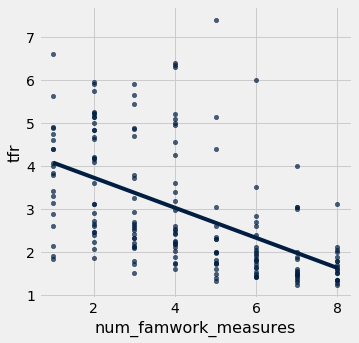

In [18]:
num_famwork.scatter('num_famwork_measures', 'tfr', fit_line=True)

We can study this question more quantitatively by calculating the average TFR for each possible number of family/work balance policies:

In [19]:
num_famwork.select('num_famwork_measures', 'tfr').group('num_famwork_measures', np.mean)

num_famwork_measures | tfr mean
1                    | 3.84983
2                    | 3.94246
3                    | 3.14785
4                    | 3.34184
5                    | 2.53735
6                    | 2.16554
7                    | 1.92016
8                    | 1.70376

Finally, we can plot the averages:

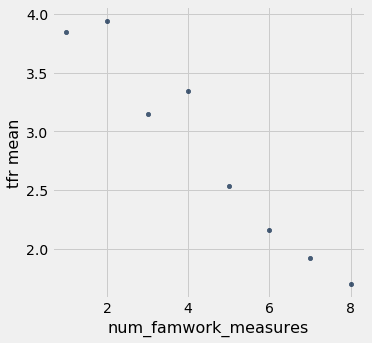

In [20]:
num_famwork.select('num_famwork_measures', 'tfr').group('num_famwork_measures', np.mean).scatter('num_famwork_measures', 'tfr mean')

This suggests that countires with more family/work balance policies tend to have lower fertility. Of course, this does **not** necessarily mean that family/work balance policies lower fertility - instead, it seems more likely that the opposite is true: countries with low fertility enact family/work balance policies because they are wealthier and perhaps because they hope to raise their fertility.

### Estimates of human capital around the world

The next dataset has IHME's estimates of human capital around the world:

In [21]:
ihme_human_capital = Table.read_table('../data/projects/ihme_human_capital.csv')
ihme_human_capital

location_id | location_name | sex   | year | human_capital_index
6           | China         | Males | 1990 | 11.2512
6           | China         | Males | 1991 | 11.4311
6           | China         | Males | 1992 | 11.62
6           | China         | Males | 1993 | 11.7934
6           | China         | Males | 1994 | 11.9828
6           | China         | Males | 1995 | 12.1749
6           | China         | Males | 1996 | 12.4558
6           | China         | Males | 1997 | 12.7288
6           | China         | Males | 1998 | 13.0043
6           | China         | Males | 1999 | 13.2901
... (15785 rows omitted)

We'll also load a crosswalk, which allows us to link the IHME data to the UNPD data:

In [22]:
ihme_unpd_xwalk = Table.read_table('../data/projects/unpd_ihme_crosswalk.csv')
ihme_unpd_xwalk

area                | country_code | location_id
Afghanistan         | 4            | 160
Albania             | 8            | 43
Algeria             | 12           | 139
American Samoa      | 16           | 298
Andorra             | 20           | 74
Angola              | 24           | 168
Antigua and Barbuda | 28           | 105
Argentina           | 32           | 97
Armenia             | 51           | 33
Australia           | 36           | 71
... (185 rows omitted)

We provide the crosswalk because in this topic area, you will likely want to combine the new datasets introduced below with data that we used earlier in the semester, over the course of the labs and the homeworks. For example, some relevant datasets that we have analyzed before include:

* The economic development indicators from the World Bank, which we used in Lab 03 and Homework 02 (`wdi_dat`)
* Data on which region each country is in, as well as its broad economic group (low/middle/high-income, etc), which we used in Lab 03 (`geo`)

These datasets would be a good place to start if you are interested in global development, fertility change, or gender around the world.

Let's be sure we figure out how to use the crosswalk, since it will likely be important to how you use the human capital dataset. Let's focus on the year 2000, and try to join together the human capital estimates and the UNPD total fertility rate estimates.

We'll start by creating datasets for the year 2000 from each source:

In [25]:
unpd_tfr_2000 = unpd_tfr.where('period', 2000)
ihme_hc_2000 = ihme_human_capital.where('year', 2000).where('sex', 'Females')

**Question - Use the crosswalk to join these two tables together**

In [26]:
both_2000 = ...
both_2000 = ...
both_2000

location_id | area                             | row  | variant   | notes | country_code | period | tfr    | country_code_2 | location_name | sex     | year | human_capital_index
6           | China                            | 78   | Estimates | 4     | 156          | 2000   | 1.51   | 156            | China         | Females | 2000 | 14.5394
7           | Dem. People's Republic of Korea  | 82   | Estimates | nan   | 408          | 2000   | 2.01   | 408            | North Korea   | Females | 2000 | 7.71275
8           | China, Taiwan Province of China  | 81   | Estimates | nan   | 158          | 2000   | 1.6675 | 158            | Taiwan        | Females | 2000 | 24.1114
10          | Cambodia                         | 105  | Estimates | nan   | 116          | 2000   | 4.25   | 116            | Cambodia      | Females | 2000 | 3.6442
11          | Indonesia                        | 106  | Estimates | nan   | 360          | 2000   | 2.55   | 360            | Indonesia     | Females | 2000 | 7.4619
12          | Lao People's Democratic Republic | 107  | Estimates | nan   | 418          | 2000   | 4.8064 | 418            | Laos          | Females | 2000 | 3.76371
13          | Malaysia                         | 108  | Estimates | 8     | 458          | 2000   | 3.1251 | 458            | Malaysia      | Females | 2000 | 11.8347
14          | Maldives                         | 99   | Estimates | nan   | 462          | 2000   | 3.5197 | 462            | Maldives      | Females | 2000 | 7.24031
15          | Myanmar                          | 109  | Estimates | nan   | 104          | 2000   | 2.95   | 104            | Myanmar       | Females | 2000 | 4.79844
16          | Philippines                      | 110  | Estimates | nan   | 608          | 2000   | 3.9    | 608            | Philippines   | Females | 2000 | 7.50375
... (178 rows omitted)

In [26]:
## SOLUTION
both_2000 = unpd_tfr_2000.join('area', ihme_unpd_xwalk, 'area')
both_2000 = both_2000.join('location_id', ihme_hc_2000, 'location_id')
both_2000

location_id | area                             | row  | variant   | notes | country_code | period | tfr    | country_code_2 | location_name | sex     | year | human_capital_index
6           | China                            | 78   | Estimates | 4     | 156          | 2000   | 1.51   | 156            | China         | Females | 2000 | 14.5394
7           | Dem. People's Republic of Korea  | 82   | Estimates | nan   | 408          | 2000   | 2.01   | 408            | North Korea   | Females | 2000 | 7.71275
8           | China, Taiwan Province of China  | 81   | Estimates | nan   | 158          | 2000   | 1.6675 | 158            | Taiwan        | Females | 2000 | 24.1114
10          | Cambodia                         | 105  | Estimates | nan   | 116          | 2000   | 4.25   | 116            | Cambodia      | Females | 2000 | 3.6442
11          | Indonesia                        | 106  | Estimates | nan   | 360          | 2000   | 2.55   | 360            | Indonesia     | Females | 2000 | 7.4619
12          | Lao People's Democratic Republic | 107  | Estimates | nan   | 418          | 2000   | 4.8064 | 418            | Laos          | Females | 2000 | 3.76371
13          | Malaysia                         | 108  | Estimates | 8     | 458          | 2000   | 3.1251 | 458            | Malaysia      | Females | 2000 | 11.8347
14          | Maldives                         | 99   | Estimates | nan   | 462          | 2000   | 3.5197 | 462            | Maldives      | Females | 2000 | 7.24031
15          | Myanmar                          | 109  | Estimates | nan   | 104          | 2000   | 2.95   | 104            | Myanmar       | Females | 2000 | 4.79844
16          | Philippines                      | 110  | Estimates | nan   | 608          | 2000   | 3.9    | 608            | Philippines   | Females | 2000 | 7.50375
... (178 rows omitted)

**Question - Make a scatterplot comparing the human capital index (x axis) and the total fertility rate (y axis)**

In [ ]:
...

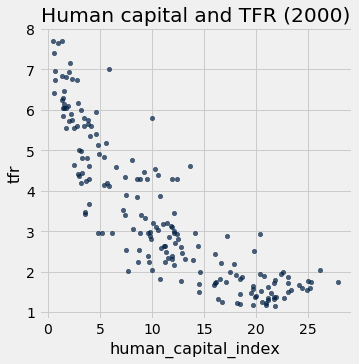

In [29]:
## SOLUTION
both_2000.scatter('human_capital_index', 'tfr')
plots.title('Human capital and TFR (2000)');

Here are some additional dataset that might be relevant. (Other datasets from previous labs/homeworks have interesting info, too -- it depends on what topic you want to explore in your project.)

Economic development indicators from the World Bank (from Lab 03 and Homework 02):

In [23]:
wdi_dat = Table.read_table('../data/WB/wdi_health_2015_cleaned.csv')

Information about each country's geography and economic status (low/middle/high-income, etc)

In [24]:
geo = Table.read_table('../data/UNPD/unpd_geo_cleaned.csv')

**Now you can explore the global policy and human capital datasets on your own.**

**NOTE: EVEN THOUGH there are no formal unit tests for this lab, please be sure to submit it using OkPy by running the cell below**

### Submit your assignment by MIDNIGHT on the day of class

Please submit your lab in by running the cell below. You can submit as many times as you want, up to midnight on the day of the class. No late submissions are allowed, and the system will prevent you from being able to submit late.

In [ ]:
_ = lab09.submit()